In [2]:
# general package
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from copy import deepcopy

# ?!CA package
from utils import GradCAM, show_cam_on_image

# torch package
import torch
from torchvision import models
from torchvision import transforms
from torch import nn

In [3]:
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(512, 7)
model.load_state_dict(torch.load("./resnet18_43.pth"))
target_layers = [model.layer4]
data_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Resize([224, 224])])

In [4]:
path = "/run/media/viper/LSP/Dataset/RAF-DB/basic/EmoLabel/list_patition_label.txt"
df = pd.read_csv(path, sep=" ", names=("path", "label"))

In [5]:
imgList = []
for i in range(7):
    imgList.append([])
    for j in range(5):
        curpath = df.loc[df["label"] == i+1].iloc[j][0]
        p = deepcopy(curpath)
        imgList[-1].append(p)

In [6]:
image_list = []
counter = 1
for i in range(7):
    image_list.append([])
    for j in range(5):
        curpath = df.loc[df["label"] == i+1].iloc[i][0]
        temp = imgList[i][j].split(".")
        img = Image.open("/run/media/viper/LSP/Dataset/RAF-DB/basic/Image/aligned/" + temp[0] + "_" + "aligned." + temp[1]).convert("RGB")
        img = np.array(img, dtype=np.uint8)
        resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
        img_tensor = data_transform(img)
        input_tensor = torch.unsqueeze(img_tensor, dim=0)
        cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
        target_category = i
        grayscale_cam = cam(input_tensor=input_tensor, target_category=target_category)
        grayscale_cam = grayscale_cam[0, :]
        visualization = show_cam_on_image(resized.astype(dtype=np.float32)/255., grayscale_cam)
        copy_visual = deepcopy(visualization)
        image_list[-1].append(copy_visual)


# Visualization of the ResNet-18 result
To demonstate the different image response to different label, we use condition probabiltity notion
$$\Large
R(A|B)
$$

Which indicates the B label image response to A label.


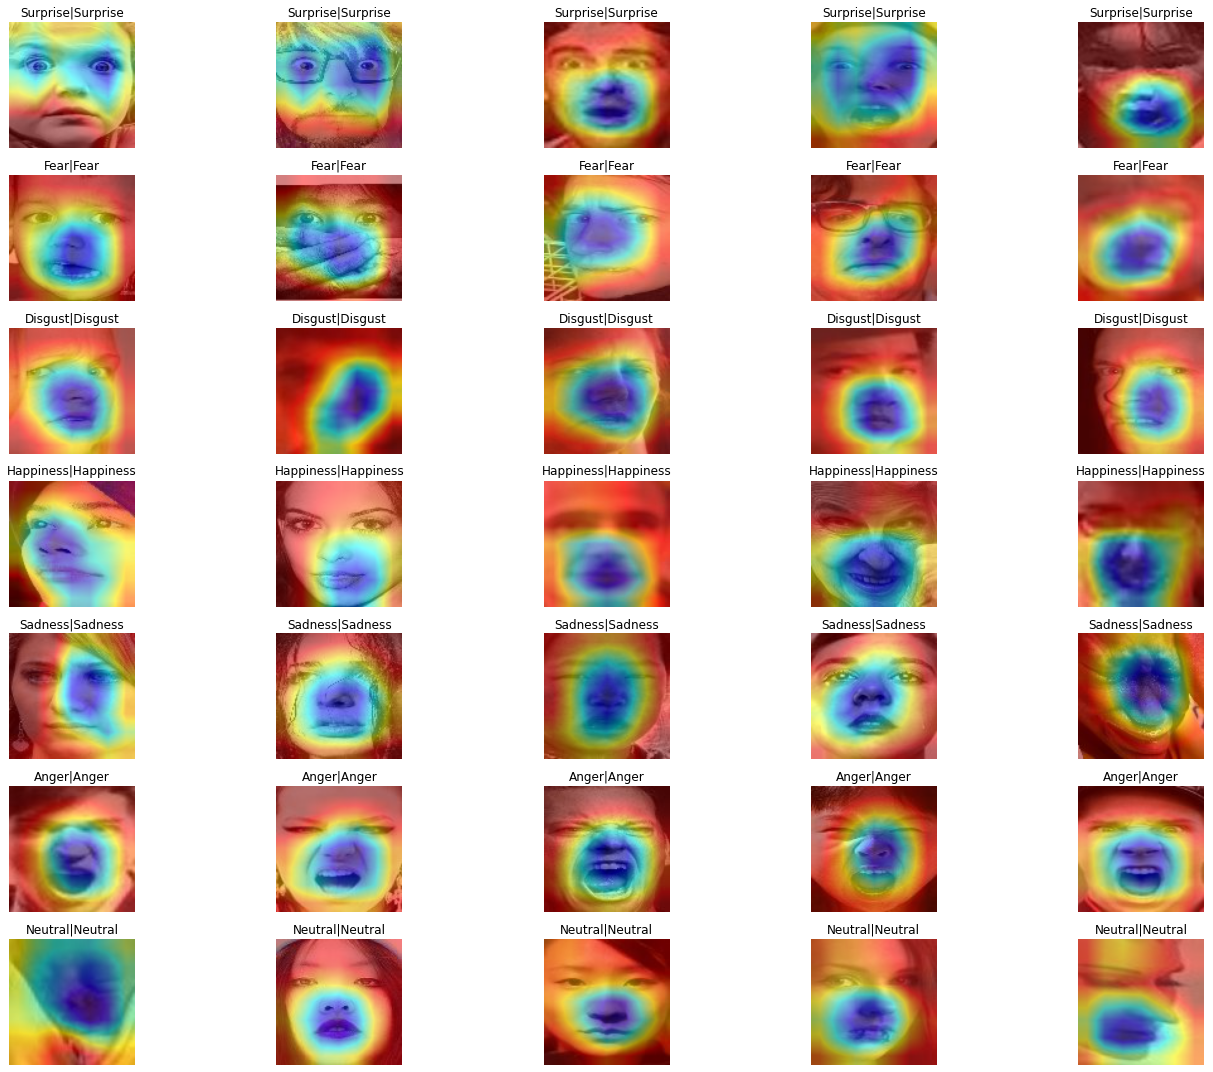

In [8]:
fig, ax = plt.subplots(nrows=7, ncols=5, figsize=(20,15))
num2label = ["Surprise", "Fear", "Disgust", "Happiness", "Sadness", "Anger", "Neutral"]
counter = 1

for i in range(7):
    image_list.append([])
    for j in range(5):
        plt.subplot(7, 5, counter)
        plt.title(num2label[i] + "|" + num2label[i])
        plt.imshow(image_list[i][j])
        counter += 1
        plt.axis("off")
fig.tight_layout()
plt.savefig("1.png", dpi = 300)


In [10]:
image_list_1 = []
counter = 1
for i in range(7):
    image_list_1.append([])
    for j in range(5):
        curpath = df.loc[df["label"] == i+1].iloc[i][0]
        temp = imgList[i][j].split(".")
        img = Image.open("/run/media/viper/LSP/Dataset/RAF-DB/basic/Image/aligned/" + temp[0] + "_" + "aligned." + temp[1]).convert("RGB")
        img = np.array(img, dtype=np.uint8)
        resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
        img_tensor = data_transform(img)
        input_tensor = torch.unsqueeze(img_tensor, dim=0)
        cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
        target_category = j
        grayscale_cam = cam(input_tensor=input_tensor, target_category=target_category)
        grayscale_cam = grayscale_cam[0, :]
        visualization = show_cam_on_image(resized.astype(dtype=np.float32)/255., grayscale_cam)
        copy_visual = deepcopy(visualization)
        image_list_1[-1].append(copy_visual)


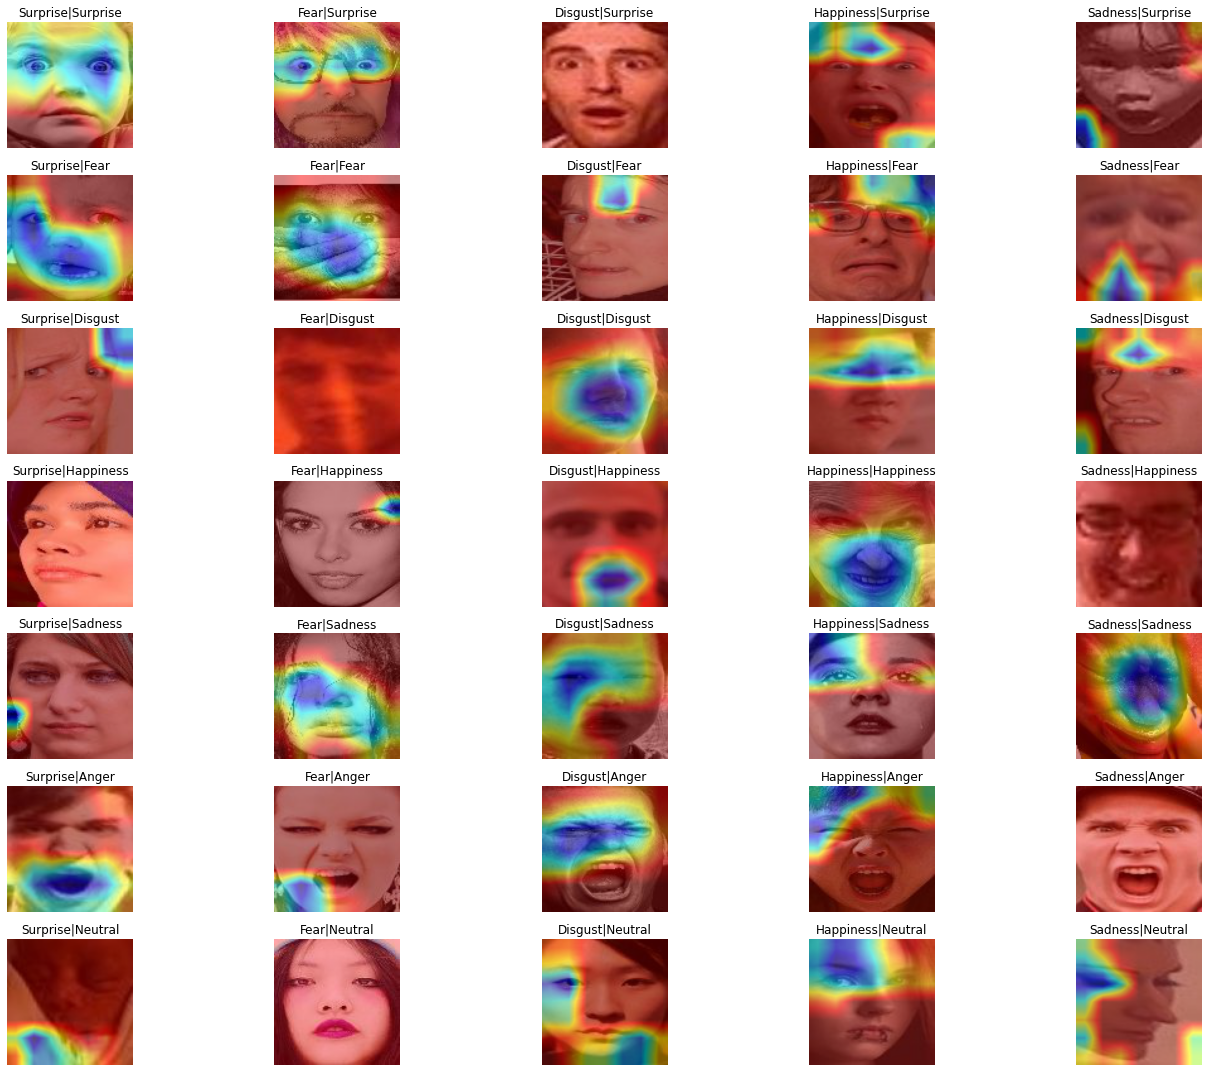

In [11]:
fig, ax = plt.subplots(nrows=7, ncols=5, figsize=(20,15))
num2label = ["Surprise", "Fear", "Disgust", "Happiness", "Sadness", "Anger", "Neutral"]
counter = 1

for i in range(7):
    image_list.append([])
    for j in range(5):
        plt.subplot(7, 5, counter)
        plt.title(num2label[j] + "|" + num2label[i])
        plt.imshow(image_list_1[i][j])
        counter += 1
        plt.axis("off")
fig.tight_layout()
plt.savefig("1.png", dpi = 300)
